In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ccdefault.csv')

In [3]:
df.shape

(30000, 25)

In [4]:
df = df[df.columns[1:]]

In [5]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.shape

(30000, 24)

In [7]:
#no need to drop na
#decision tree, 
import sklearn
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:23].values
y=df[df.columns[23]]

#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size=0.10, random_state=1)

In [8]:
dX = df.iloc[:, 0:23]
df.feature_names = list(dX.columns.values) 
df.class_names = df.columns[23]

/Users/changxuezhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [9]:
df.class_names

'DEFAULT'

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=1)
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of
dt = DecisionTreeClassifier(max_depth=3, random_state=0)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.82


In [11]:
from sklearn.externals.six import StringIO  
dot_data = StringIO()

/Users/changxuezhi/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [12]:
from IPython.display import Image  

In [13]:
from sklearn.tree import export_graphviz

In [14]:
import pydotplus

In [15]:
export_graphviz(dt, out_file=dot_data,feature_names = df.feature_names, class_names = df.class_names,   
                filled=True, rounded=True,
                special_characters=True)


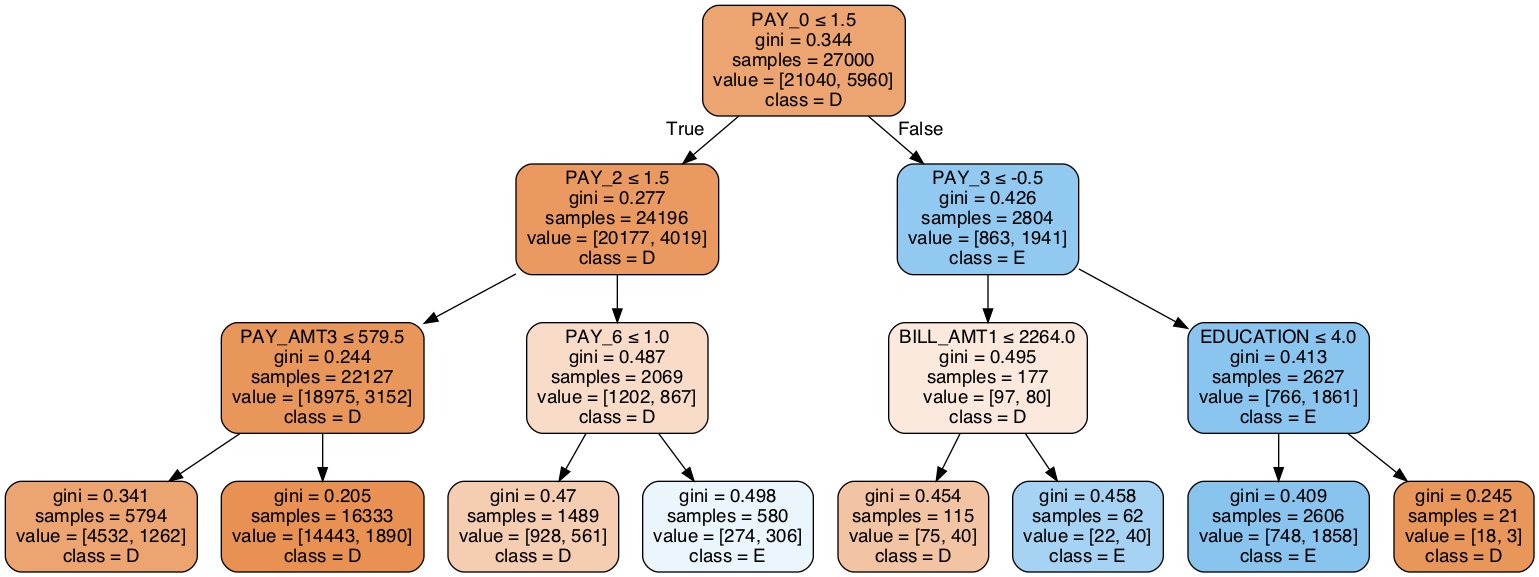

In [16]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [18]:
resulttrain = []
resulttest = []

#for x in range(1,13):
#    result.append((x, Boston_monthly_temp(x)))
for k in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=k)
    dt = DecisionTreeClassifier(max_depth=3, random_state=k)
    # Fit dt to the training set
    dt.fit(X_train, y_train)

    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)
    
    acctrain = accuracy_score(y_train, y_train_pred)
    #print("random state =",k ,"Train set accuracy: {:.4f}".format(acctrain))
    
    resulttrain.append(( k,acctrain))
    acctest = accuracy_score(y_test, y_test_pred)
   # print("random state =",k ,"Test set accuracy: {:.4f}".format(acctest))
    resulttest.append(( k,acctest))



In [19]:
resulttrain

[(1, 0.8222222222222222),
 (2, 0.8213703703703704),
 (3, 0.8200740740740741),
 (4, 0.822925925925926),
 (5, 0.8208148148148148),
 (6, 0.8228518518518518),
 (7, 0.8217777777777778),
 (8, 0.8202592592592592),
 (9, 0.8222592592592592),
 (10, 0.8207037037037037)]

In [20]:
resulttest

[(1, 0.824),
 (2, 0.823),
 (3, 0.835),
 (4, 0.8106666666666666),
 (5, 0.8313333333333334),
 (6, 0.8116666666666666),
 (7, 0.8193333333333334),
 (8, 0.8306666666666667),
 (9, 0.817),
 (10, 0.8306666666666667)]

In [26]:
X = df.iloc[:, 0:23].values
y=df[df.columns[23]]

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skf = StratifiedKFold(n_splits=10,random_state=1)
skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

clf = tree.DecisionTreeClassifier(max_depth=3)
insample_scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, n_jobs=-1)
outsample_scores = cross_val_score(estimator=clf, X=X_test, y=y_test, cv=10, n_jobs=-1)
insample_scores

array([0.80895964, 0.80340615, 0.82265827, 0.80703704, 0.81037037,
       0.82518519, 0.83740741, 0.82703704, 0.83586514, 0.82586143])

In [27]:
insample_scores.mean()

0.8203787667592678

In [28]:
insample_scores.std()

0.011528782017298138

In [29]:
outsample_scores

array([0.84717608, 0.82392027, 0.81727575, 0.84333333, 0.82      ,
       0.83      , 0.82943144, 0.81939799, 0.84615385, 0.81939799])

In [30]:
outsample_scores.mean()

0.8296086697259598

In [31]:
outsample_scores.std()

0.011208072842646384

In [32]:
print("My name is Xuehui Chao")
print("My NetID is: xuehuic2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Xuehui Chao
My NetID is: xuehuic2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
